# Question

Take any dataset of your choice and perform the following:
- Apply numpy and pandas functions to the dataset
- Check for null values and if found impute the mode for categorical variables and mean for numerical variable.

# Importing the required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\mitug\Machine-Learning-Lab\Lab-3_Data_Handling\Loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,N
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Status        367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


# General Application of pandas functions

In [58]:
df.iloc[9]

Gender                  0.0
Married                 1.0
Dependents              1.0
Education               1.0
Self_Employed           1.0
ApplicantIncome      2400.0
CoapplicantIncome    2400.0
LoanAmount            123.0
Loan_Amount_Term      360.0
Credit_History          1.0
Property_Area           1.0
Loan_Status             1.0
Name: 9, dtype: float64

In [57]:
df.loc[df["ApplicantIncome"]<1500]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,0,1,1,0,1,1300,3470,100.0,180.0,1.0,1,1
25,0,1,1,0,1,0,24000,148.0,360.0,0.0,2,0
116,1,1,1,1,1,0,1760,180.0,360.0,1.0,1,0
119,0,0,2,0,1,724,3510,213.0,360.0,0.0,2,1
166,0,1,2,1,1,1141,2017,120.0,360.0,0.0,0,1
232,0,0,1,0,1,1173,1594,28.0,180.0,1.0,2,1
303,0,0,3,1,0,570,2125,68.0,360.0,1.0,2,0


In [33]:
df[["Education","LoanAmount"]].groupby(by="Education").describe()

LoanAmount                                                          
               count        mean        std   min    25%    50%     75%    max
Education                                                                     
0              283.0  141.284560  65.702204  28.0  103.5  130.0  161.00  550.0
1               84.0  118.775388  36.293198  28.0   90.0  120.5  143.25  199.0

In [42]:
def div5(x):
    return x//5
df.Loan_Amount_Term.apply(div5)

0      72.0
1      72.0
2      72.0
3      72.0
4      72.0
       ... 
362    72.0
363    72.0
364    72.0
365    72.0
366    36.0
Name: Loan_Amount_Term, Length: 367, dtype: float64

# General Application of numpy functions

In [44]:
np.count_nonzero(df.Property_Area)

227

In [60]:
np.sum(df.LoanAmount)

49960.66298342541

In [62]:
np.isfinite(df.Credit_History).value_counts()

True    367
Name: Credit_History, dtype: int64

# Drop useless columns from the dataset

In [5]:
df = df.drop("Loan_ID",axis=1)

# Seggregating the variables

In [6]:
target = "Loan_Status"

In [7]:
categorical = ["Credit_History"]
for i in df.columns:
    if df.dtypes[i] == 'object' and i != 'Loan_ID':
        categorical.append(i)

In [8]:
numerical = set(df.columns).difference(categorical)

In [9]:
categorical

['Credit_History',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [10]:
numerical

{'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'}

# About the Dataset

## Details for Numerical Columns

In [11]:
df[numerical].describe()

,LoanAmount,CoapplicantIncome,Loan_Amount_Term,ApplicantIncome
count,362.000000,367.000000,361.000000,367.000000
mean,136.132597,1569.577657,342.537396,4805.599455
std,61.366652,2334.232099,65.156643,4910.685399
min,28.000000,0.000000,6.000000,0.000000
25%,100.250000,0.000000,360.000000,2864.000000
50%,125.000000,1025.000000,360.000000,3786.000000
75%,158.000000,2430.500000,360.000000,5060.000000
max,550.000000,24000.000000,480.000000,72529.000000


# Details for Categorical Columns

In [25]:
df[categorical].mode()

Credit_History    1.0
Gender            0.0
Married           0.0
Dependents        1.0
Education         0.0
Self_Employed     1.0
Property_Area     1.0
Loan_Status       1.0
dtype: float64

# Exploring Numerical Variables

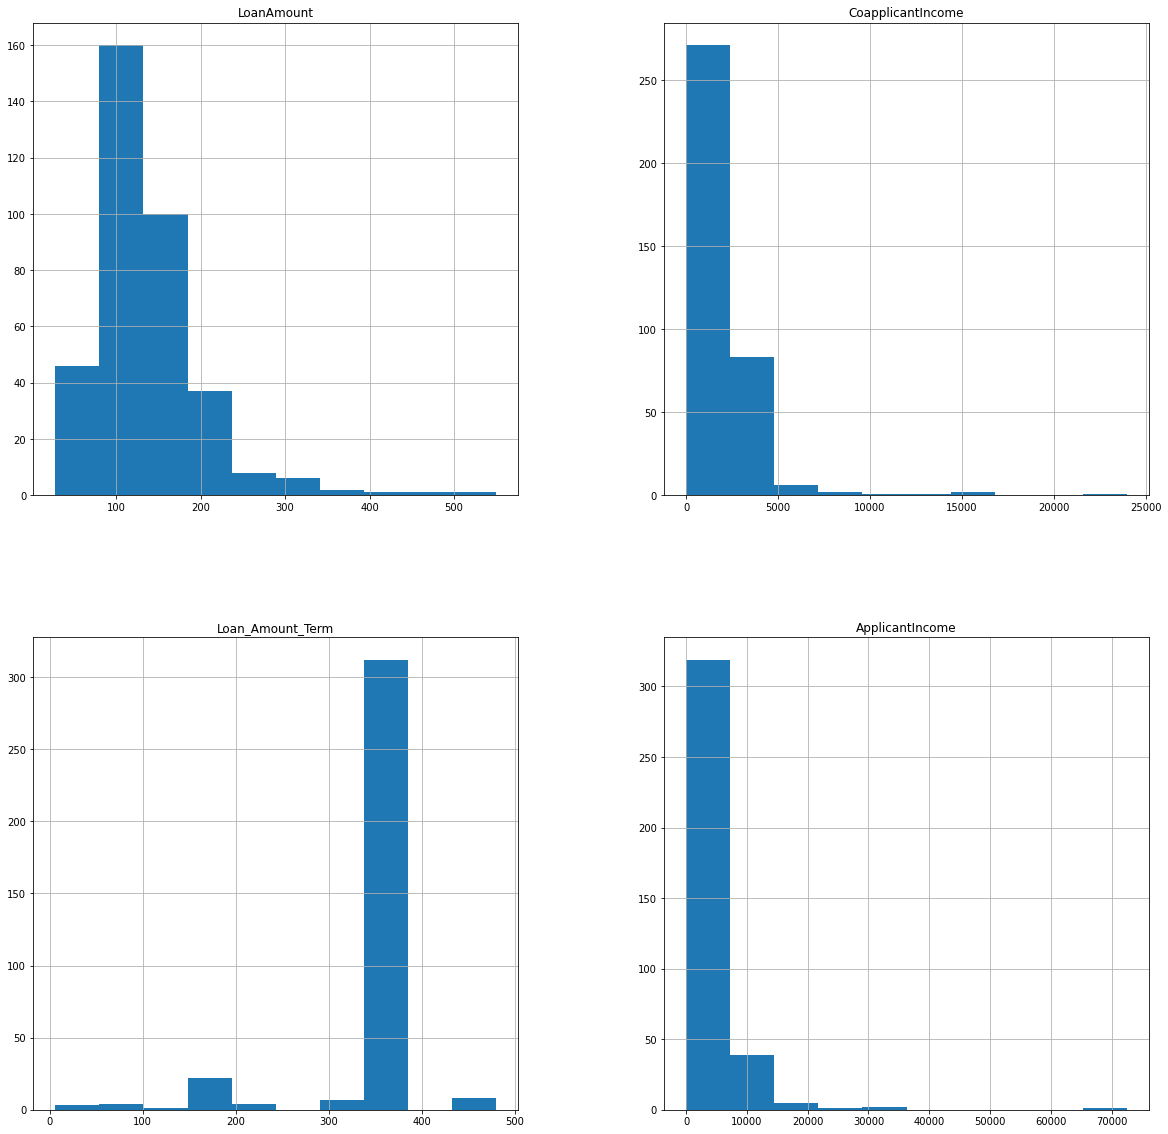

In [13]:
df[numerical].hist(bins=10,figsize=(20,20))
plt.show()

# Exploring Categorical Variables

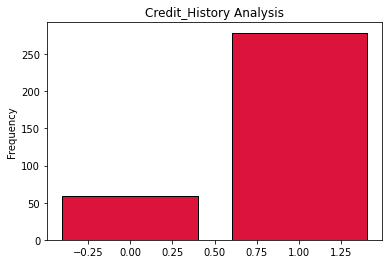

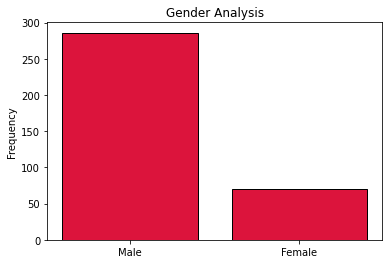

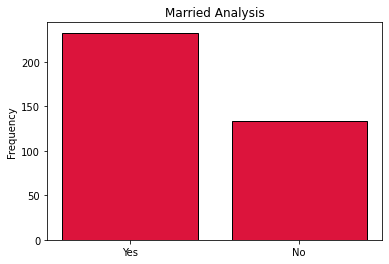

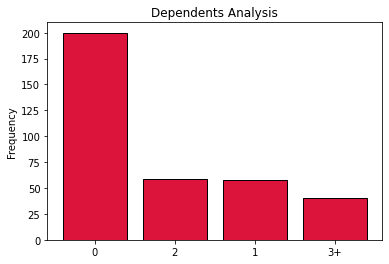

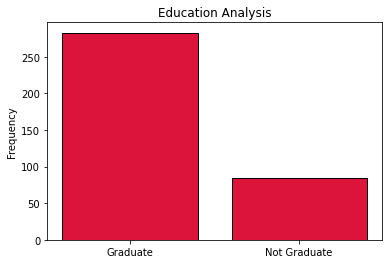

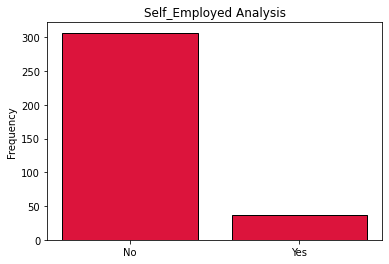

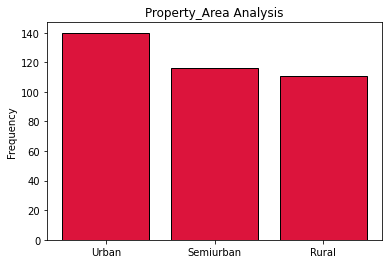

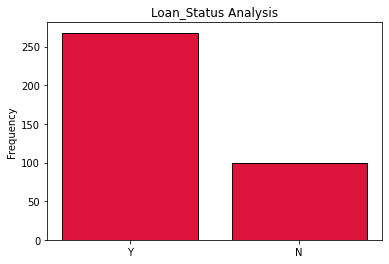

In [14]:
for i in categorical:
    t = dict(df[i].value_counts())
    plt.bar(t.keys(),t.values(),color='crimson',edgecolor='black')
    plt.title(i+" Analysis")
    plt.ylabel("Frequency")
    plt.show()

# Checking for Missing Values

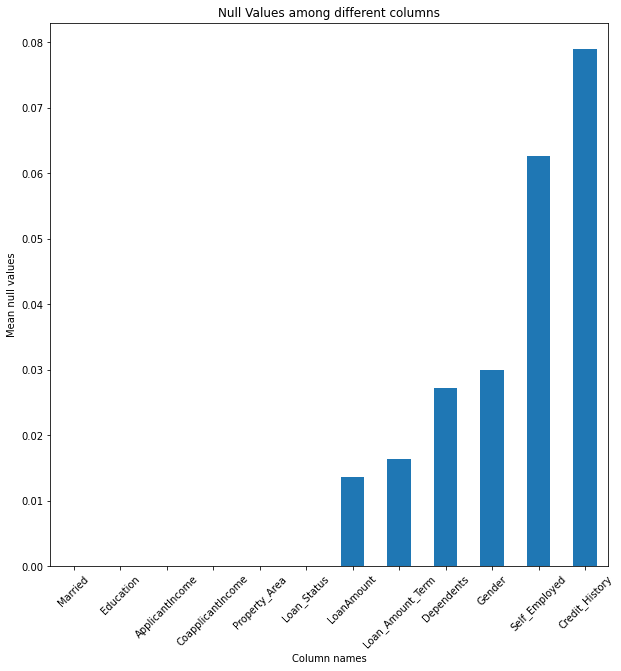

In [15]:
plt.figure(figsize=(10,10))
df.isnull().mean().sort_values().plot.bar()
plt.xticks(rotation=45)
plt.title("Null Values among different columns")
plt.xlabel("Column names")
plt.ylabel("Mean null values")
plt.show()

In [16]:
n = dict(df.isnull().sum())
col_null = []
for i in df.columns:
    if n[i] != 0:
     col_null.append(i)

In [17]:
col_null

['Gender',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Handling the missing values using Imputation

In [18]:
for i in col_null:
    if i in categorical:
        df[i].fillna(df[i].mode()[0],inplace = True)
    elif i in numerical:
        mean = df[i].mean()
        df[i].fillna(mean,inplace = True)

In [19]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Encoding Categorical Variables

In [20]:
encodings = dict()
for i in categorical:
    x = list(set(df[i]))
    encodings[i] = [x,[i for i in range(0,len(x))]]

In [21]:
categorical

['Credit_History',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [22]:
encodings

{'Credit_History': [[0.0, 1.0], [0, 1]],
 'Gender': [['Male', 'Female'], [0, 1]],
 'Married': [['Yes', 'No'], [0, 1]],
 'Dependents': [['3+', '0', '2', '1'], [0, 1, 2, 3]],
 'Education': [['Graduate', 'Not Graduate'], [0, 1]],
 'Self_Employed': [['Yes', 'No'], [0, 1]],
 'Property_Area': [['Urban', 'Semiurban', 'Rural'], [0, 1, 2]],
 'Loan_Status': [['N', 'Y'], [0, 1]]}

In [23]:
for i in encodings:
    df[i] = df[i].replace(encodings[i][0],encodings[i][1])

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,1,5720,0,110.0,360.0,1.0,0,1
1,0,0,3,0,1,3076,1500,126.0,360.0,1.0,0,1
2,0,0,2,0,1,5000,1800,208.0,360.0,1.0,0,1
3,0,0,2,0,1,2340,2546,100.0,360.0,1.0,0,0
4,0,1,1,1,1,3276,0,78.0,360.0,1.0,0,0
